In [1]:
!pip install Google-Images-Search
!pip install Pillow==9.0.0

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Nick's Directory

In [ ]:
% cd "/content/drive/My Drive/Data Science Incubator/FinalProject/data"
% ls .

[Errno 2] No such file or directory: '/content/drive/My Drive/Data Science Incubator/FinalProject/data'
/content
drive/  sample_data/


### Tim's Directory

In [ ]:
% cd "/content/drive/My Drive/Data Science Incubator/FinalProject/data"
% ls .

###Angel's Directory

In [4]:
% cd "/content/drive/My Drive/CS-6830/FinalProject/data/animals/"
% ls .

/content/drive/My Drive/CS-6830/FinalProject/data/animals
google_images/  NNmodeldropout.h5py/  NNmodelnodropout.h5py/  train/  val/


## Attempting to use google image api to get images

In [ ]:
#API_KEY = # Secret
#cx = # Secret

In [ ]:
from google_images_search import GoogleImagesSearch

gis = GoogleImagesSearch(developer_key=API_KEY, custom_search_cx=cx, validate_images=True) 

In [ ]:
_search_params = {
    'q': 'cat',
    'num': 500,
    'fileType': 'jpg|png',
    'rights': 'cc_publicdomain|cc_attribute|cc_sharealike|cc_noncommercial|cc_nonderived',
}

In [ ]:
save_dir = 'google_images/cats'
gis.search(search_params=_search_params, path_to_dir=save_dir, width=512, height=512)

In [ ]:
_search_params = {
    'q': 'dog',
    'num': 50,
    'fileType': 'jpg|png',
    'rights': 'cc_publicdomain|cc_attribute|cc_sharealike|cc_noncommercial|cc_nonderived',
}

In [ ]:
save_dir = 'google_images/dogs'
gis.search(search_params=_search_params, path_to_dir=save_dir, width=512, height=512)

In [ ]:
_search_params = {
    'q': 'wildlife animals',
    'num': 150,
    'fileType': 'jpg|png',
    'rights': 'cc_publicdomain|cc_attribute|cc_sharealike|cc_noncommercial|cc_nonderived',
}

In [ ]:
save_dir = 'google_images/wild'
gis.search(search_params=_search_params, path_to_dir=save_dir, width=512, height=512)

#Preexsting dataset

In [22]:
train_gen=ImageDataGenerator(rescale=1./255,rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)#1. means float values upto 255 pixels 
train_data=train_gen.flow_from_directory('train',target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=True) ## target_size is same as reshaping the image .
## batch_size is used for batch gradient descent 
test_gen=ImageDataGenerator(rescale=1./255)
test_data=test_gen.flow_from_directory('val',target_size=(64,64),batch_size=1,class_mode='categorical',shuffle=False)

testgoogle_gen=ImageDataGenerator(rescale=1./255)
testgoogle_data=test_gen.flow_from_directory('google_images',target_size=(64,64),batch_size=1,class_mode='categorical',shuffle=False)

Found 14690 images belonging to 3 classes.
Found 1542 images belonging to 3 classes.
Found 155 images belonging to 1 classes.


In [23]:
y_train_data = train_data.classes
y_train_data

y_test_data = test_data.classes
y_test_data

y_testgoogle_data = testgoogle_data.classes
y_testgoogle_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [15]:
classes = np.unique(y_train_data)

In [16]:
def createConvoNN(hasDropout = True):
  activation_function = 'linear'
  num_classes = classes.size

  nn = Sequential()
  # First Convolutional Layer
  nn.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation=activation_function, padding='same'))
  nn.add(LeakyReLU(alpha=0.1))
  nn.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  if (hasDropout):
    nn.add(Dropout(0.25))
  # Second Convolutional Layer
  nn.add(Conv2D(64, (3,3), activation=activation_function,padding='same'))
  nn.add(LeakyReLU(alpha=0.1))
  nn.add(MaxPooling2D(pool_size=(2,2),padding='same'))
  if (hasDropout):
    nn.add(Dropout(0.25))
  # Third Convolutional Layer
  nn.add(Conv2D(128, (3,3), activation=activation_function,padding='same'))
  nn.add(LeakyReLU(alpha=0.1))
  nn.add(MaxPooling2D(pool_size=(2,2),padding='same'))

  if (hasDropout):
    nn.add(Dropout(0.40))

  nn.add(Flatten())

  nn.add(Dense(128, activation=activation_function))
  nn.add(LeakyReLU(alpha=0.1)) 
  
  if (hasDropout):
    nn.add(Dropout(0.30))

  nn.add(Dense(num_classes, activation='softmax'))
  return nn


In [ ]:
convolutionalNN = createConvoNN()
convolutionalNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                        

In [ ]:
convolutionalNN.compile(optimizer=tf.keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
fit = convolutionalNN.fit(train_data, epochs=20, validation_data=(test_data))

Epoch 1/20
460/460 [==============================] - 3376s 7s/step - loss: 0.5697 - accuracy: 0.7549
Epoch 2/20
460/460 [==============================] - 206s 448ms/step - loss: 0.2756 - accuracy: 0.8973
Epoch 3/20
460/460 [==============================] - 203s 440ms/step - loss: 0.1945 - accuracy: 0.9277
Epoch 4/20
460/460 [==============================] - 209s 454ms/step - loss: 0.1656 - accuracy: 0.9372
Epoch 5/20
460/460 [==============================] - 203s 440ms/step - loss: 0.1424 - accuracy: 0.9472
Epoch 6/20
460/460 [==============================] - 203s 441ms/step - loss: 0.1365 - accuracy: 0.9491
Epoch 7/20
460/460 [==============================] - 203s 441ms/step - loss: 0.1246 - accuracy: 0.9551
Epoch 8/20
460/460 [==============================] - 203s 441ms/step - loss: 0.1104 - accuracy: 0.9600
Epoch 9/20
460/460 [==============================] - 202s 440ms/step - loss: 0.1070 - accuracy: 0.9594
Epoch 10/20
460/460 [==============================] - 202s 438ms/

In [ ]:
# Saves model with dropout
convolutionalNN.save("NNmodeldropout.h5py")

INFO:tensorflow:Assets written to: NNmodeldropout.h5py/assets


## Lets evaluate our model

In [ ]:
test_eval = convolutionalNN.evaluate(test_data, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.07921014726161957
Test accuracy: 0.9747081995010376


In [ ]:
predict = convolutionalNN.predict(test_data)
predict = np.argmax(predict, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data.classes, predict)

0.9747081712062257

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, predict)
cm

array([[492,   3,   5],
       [  8, 514,  16],
       [  4,   3, 497]])

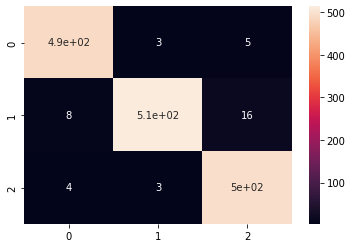

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes, predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.99      0.96      0.97       538
           2       0.96      0.99      0.97       504

    accuracy                           0.97      1542
   macro avg       0.97      0.98      0.97      1542
weighted avg       0.98      0.97      0.97      1542



##Lets try without dropout

In [ ]:
convolutionalNN2 = createConvoNN(hasDropout=False)
convolutionalNN2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [ ]:
convolutionalNN2.compile(optimizer=tf.keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'])
fit = convolutionalNN2.fit(train_data, epochs=20, validation_data=(test_data))

Epoch 1/20
460/460 [==============================] - 231s 495ms/step - loss: 0.4060 - accuracy: 0.8370 - val_loss: 0.2500 - val_accuracy: 0.9144
Epoch 2/20
460/460 [==============================] - 209s 454ms/step - loss: 0.1687 - accuracy: 0.9382 - val_loss: 0.2700 - val_accuracy: 0.8982
Epoch 3/20
460/460 [==============================] - 211s 459ms/step - loss: 0.1275 - accuracy: 0.9541 - val_loss: 0.1354 - val_accuracy: 0.9585
Epoch 4/20
460/460 [==============================] - 215s 467ms/step - loss: 0.0968 - accuracy: 0.9646 - val_loss: 0.0896 - val_accuracy: 0.9676
Epoch 5/20
460/460 [==============================] - 213s 464ms/step - loss: 0.0870 - accuracy: 0.9696 - val_loss: 0.0785 - val_accuracy: 0.9747
Epoch 6/20
460/460 [==============================] - 211s 458ms/step - loss: 0.0764 - accuracy: 0.9707 - val_loss: 0.1148 - val_accuracy: 0.9611
Epoch 7/20
460/460 [==============================] - 210s 457ms/step - loss: 0.0664 - accuracy: 0.9756 - val_loss: 0.0869 -

In [ ]:
convolutionalNN2.save("NNmodelnodropout.h5py")

INFO:tensorflow:Assets written to: NNmodelnodropout.h5py/assets


In [ ]:
test_eval = convolutionalNN2.evaluate(test_data, verbose=1)

1542/1542 [==============================] - 20s 13ms/step - loss: 0.0790 - accuracy: 0.9825


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.07897776365280151
Test accuracy: 0.9824903011322021


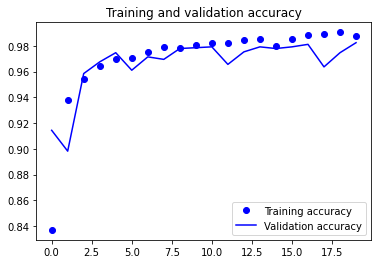

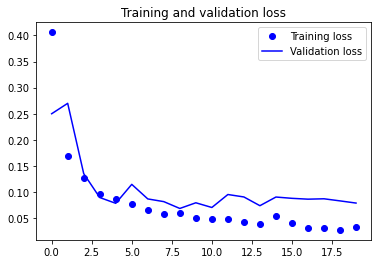

In [ ]:
accuracy = fit.history['accuracy']
val_accuracy = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

If validation loss >> training loss you can call it overfitting. \\
If validation loss  > training loss you can call it some overfitting. \\
If validation loss  < training loss you can call it some underfitting. \\
If validation loss << training loss you can call it underfitting.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predict = convolutionalNN2.predict(test_data)
predict = np.argmax(predict, axis = 1)
display(accuracy_score(test_data.classes, predict))

cm = confusion_matrix(test_data.classes, predict)
cm

0.9824902723735408

array([[490,   4,   6],
       [  4, 530,   4],
       [  3,   6, 495]])

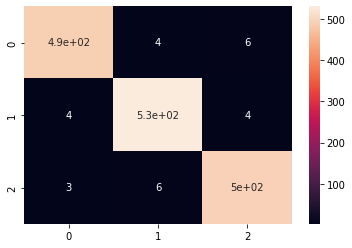

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
correct = np.where(predict==y_test_data)[0]
print("Found %d correct labels" % len(correct))
incorrect = np.where(predict!=y_test_data)[0]
print("Found %d incorrect labels" % len(incorrect))

Found 1515 correct labels
Found 27 incorrect labels


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes, predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       500
           1       0.98      0.99      0.98       538
           2       0.98      0.98      0.98       504

    accuracy                           0.98      1542
   macro avg       0.98      0.98      0.98      1542
weighted avg       0.98      0.98      0.98      1542



## Lets try testing on google images

In [19]:
convolutionalNN2 = keras.models.load_model('NNmodelnodropout.h5py')

In [24]:
test_eval = convolutionalNN2.evaluate(testgoogle_data, verbose=1)

155/155 [==============================] - 4s 23ms/step - loss: 23.4115 - accuracy: 0.5677


In [25]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 23.411468505859375
Test accuracy: 0.5677419304847717


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predict = convolutionalNN2.predict(testgoogle_data)
predict = np.argmax(predict, axis = 1)
display(accuracy_score(testgoogle_data.classes, predict))

cm = confusion_matrix(testgoogle_data.classes, predict)
cm

0.567741935483871

array([[88, 35, 32],
       [ 0,  0,  0],
       [ 0,  0,  0]])

In [27]:
correct = np.where(predict==y_testgoogle_data)[0]
print("Found %d correct labels" % len(correct))
incorrect = np.where(predict!=y_testgoogle_data)[0]
print("Found %d incorrect labels" % len(incorrect))

Found 88 correct labels
Found 67 incorrect labels


Why such low prediction? \\
 - I think its because the images from crawling google include images that dont match the search i.e search cat and dojacat comes up

Possible fixes?
- Manually go through each image and delete nonrelated images to a cat/dog/wildlife